# Submission Visualization Notebook

This notebook generates all the required visualizations required for our submission to Kaggle

In [1]:
import os
import re
import sys
import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import random
import seaborn as sns

# Libraries required for plotting field
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation
from IPython.display import HTML
from IPython import display


# Custom libraries
sys.path.append('../')
from src.utils.viz_functions import visualize_play, visualize_plays_time_series
from src.utils.play_preprocessing import preprocessPlay_refQB_NFrames, preprocessPlay_refQB, preprocessPlay_refLineScrimmageInit
from src.utils.player_influence import extract_play_players_influence, gaussian_player_influence_score, gaussian_oop_influence_score
from src.utils.field_price_functions import calculate_field_price, gaussian_field_price
from src.utils.calculate_score import calculate_defense_score, calculate_qb_score
from src.utils.full_pipeline import run_full_pipeline, run_short_pipeline

In [2]:
# Define input parameters
input_path = '../input'
preprocessing_path = '../processing'

config = {
    # Preprocessing Play parameters
    'preprocess_funct': preprocessPlay_refLineScrimmageInit,
    'hold_QB_ref': 20,
    'post_snap_time': 8,

    # Pocket parameters
    'pocket_len': 15.0,
    'pocket_res': 0.1,

    # Field Price parameters
    'pocket_linear_max_value': 1.0,
    'pocket_gaus_mu': 0.0,
    'pocket_gaus_sigma': 1.0,
    'field_price_funct': gaussian_field_price,

    # Player Influence parameters
    'gaus_mu': 0.0,
    'gaus_sigma': 1.0,
    'player_infl_funct': gaussian_player_influence_score,

    # OOP Penalty
    'qb_oop_infl_funct': gaussian_oop_influence_score,
    'qb_oop_penalty': 800.0,
    'gaus_oop_mu': 0.0,
    'gaus_oop_sigma': 1.0,
}

# 1. Analysis of Linemen Role

In [ ]:
############################
# QB Stayed in pocket & Not sacked
############################

# Load data and define Game & Play ID
week_data = pd.read_csv(os.path.join(input_path, 'week7.csv'))
gameId = "2021102400"
playId = "2055"

# Visualize play
visualize_play(week_data, gameId, playId, config, display_score=False)

In [ ]:
############################
# QB Sacked
############################

# Load data and define Game & Play ID
week_data = pd.read_csv(os.path.join(input_path, 'week3.csv'))
gameId = "2021092610"
playId = "1191"

# Visualize play
visualize_play(week_data, gameId, playId, config, display_score=False)

In [ ]:
############################
# Running Out-of-Pocket
############################

# Load data and define Game & Play ID
week_data = pd.read_csv(os.path.join(input_path, 'week6.csv'))
gameId = "2021101703"
playId = "3773"

# Visualize play
visualize_play(week_data, gameId, playId, config, display_score=False)

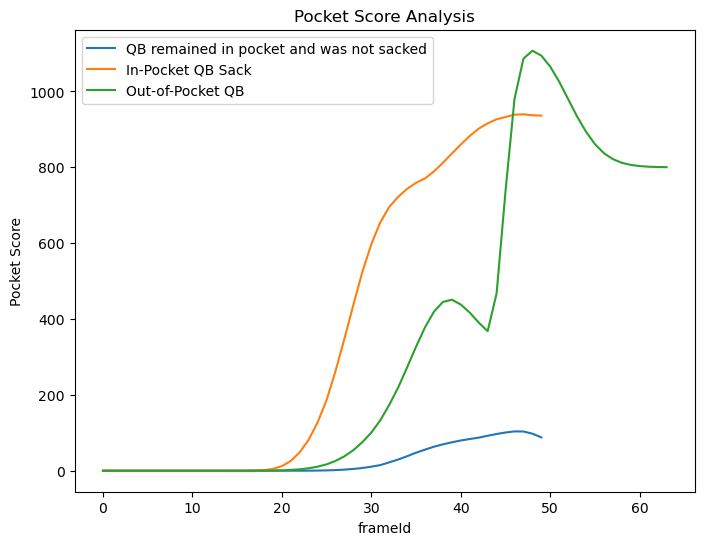

In [6]:
# Load data and define Game & Play ID
play_metadata = pd.DataFrame([
    {'week_data': pd.read_csv(os.path.join(input_path, 'week7.csv')), 'gameId': "2021102400", 'playId': "2055", 'outcome': "QB remained in pocket and was not sacked"},
    {'week_data': pd.read_csv(os.path.join(input_path, 'week3.csv')), 'gameId': "2021092610", 'playId': "1191", 'outcome': "In-Pocket QB Sack"},
    {'week_data': pd.read_csv(os.path.join(input_path, 'week6.csv')), 'gameId': "2021101703", 'playId': "3773", 'outcome': "Out-of-Pocket QB"},
])

# Mix all three plays on one single dataframe
visualize_plays_time_series(play_metadata, config=config)

# 3. Global Pocket Score Analysis 

In this section, we run the full short pipeline and generate the associated visualizations

-> Processing week1.csv


100%|██████████| 1000/1000 [05:34<00:00,  2.99it/s]


-> Processing week2.csv


100%|██████████| 917/917 [05:01<00:00,  3.04it/s]


-> Processing week3.csv


100%|██████████| 989/989 [05:30<00:00,  2.99it/s]


-> Processing week4.csv


100%|██████████| 943/943 [05:10<00:00,  3.04it/s]


-> Processing week5.csv


100%|██████████| 935/935 [04:51<00:00,  3.20it/s]


-> Processing week6.csv


100%|██████████| 841/841 [04:10<00:00,  3.35it/s]


-> Processing week7.csv


100%|██████████| 773/773 [03:39<00:00,  3.52it/s]


-> Processing week8.csv


100%|██████████| 874/874 [04:14<00:00,  3.43it/s]
/Users/miguelcachosoblechero/Documents/Kaggle/NFL_2022/MagicNFL/exploration/../src/utils/evaluate_scores.py:441: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_timeseries, x='frameId', y='frameValue', hue='pocket_outcome', ci=95)


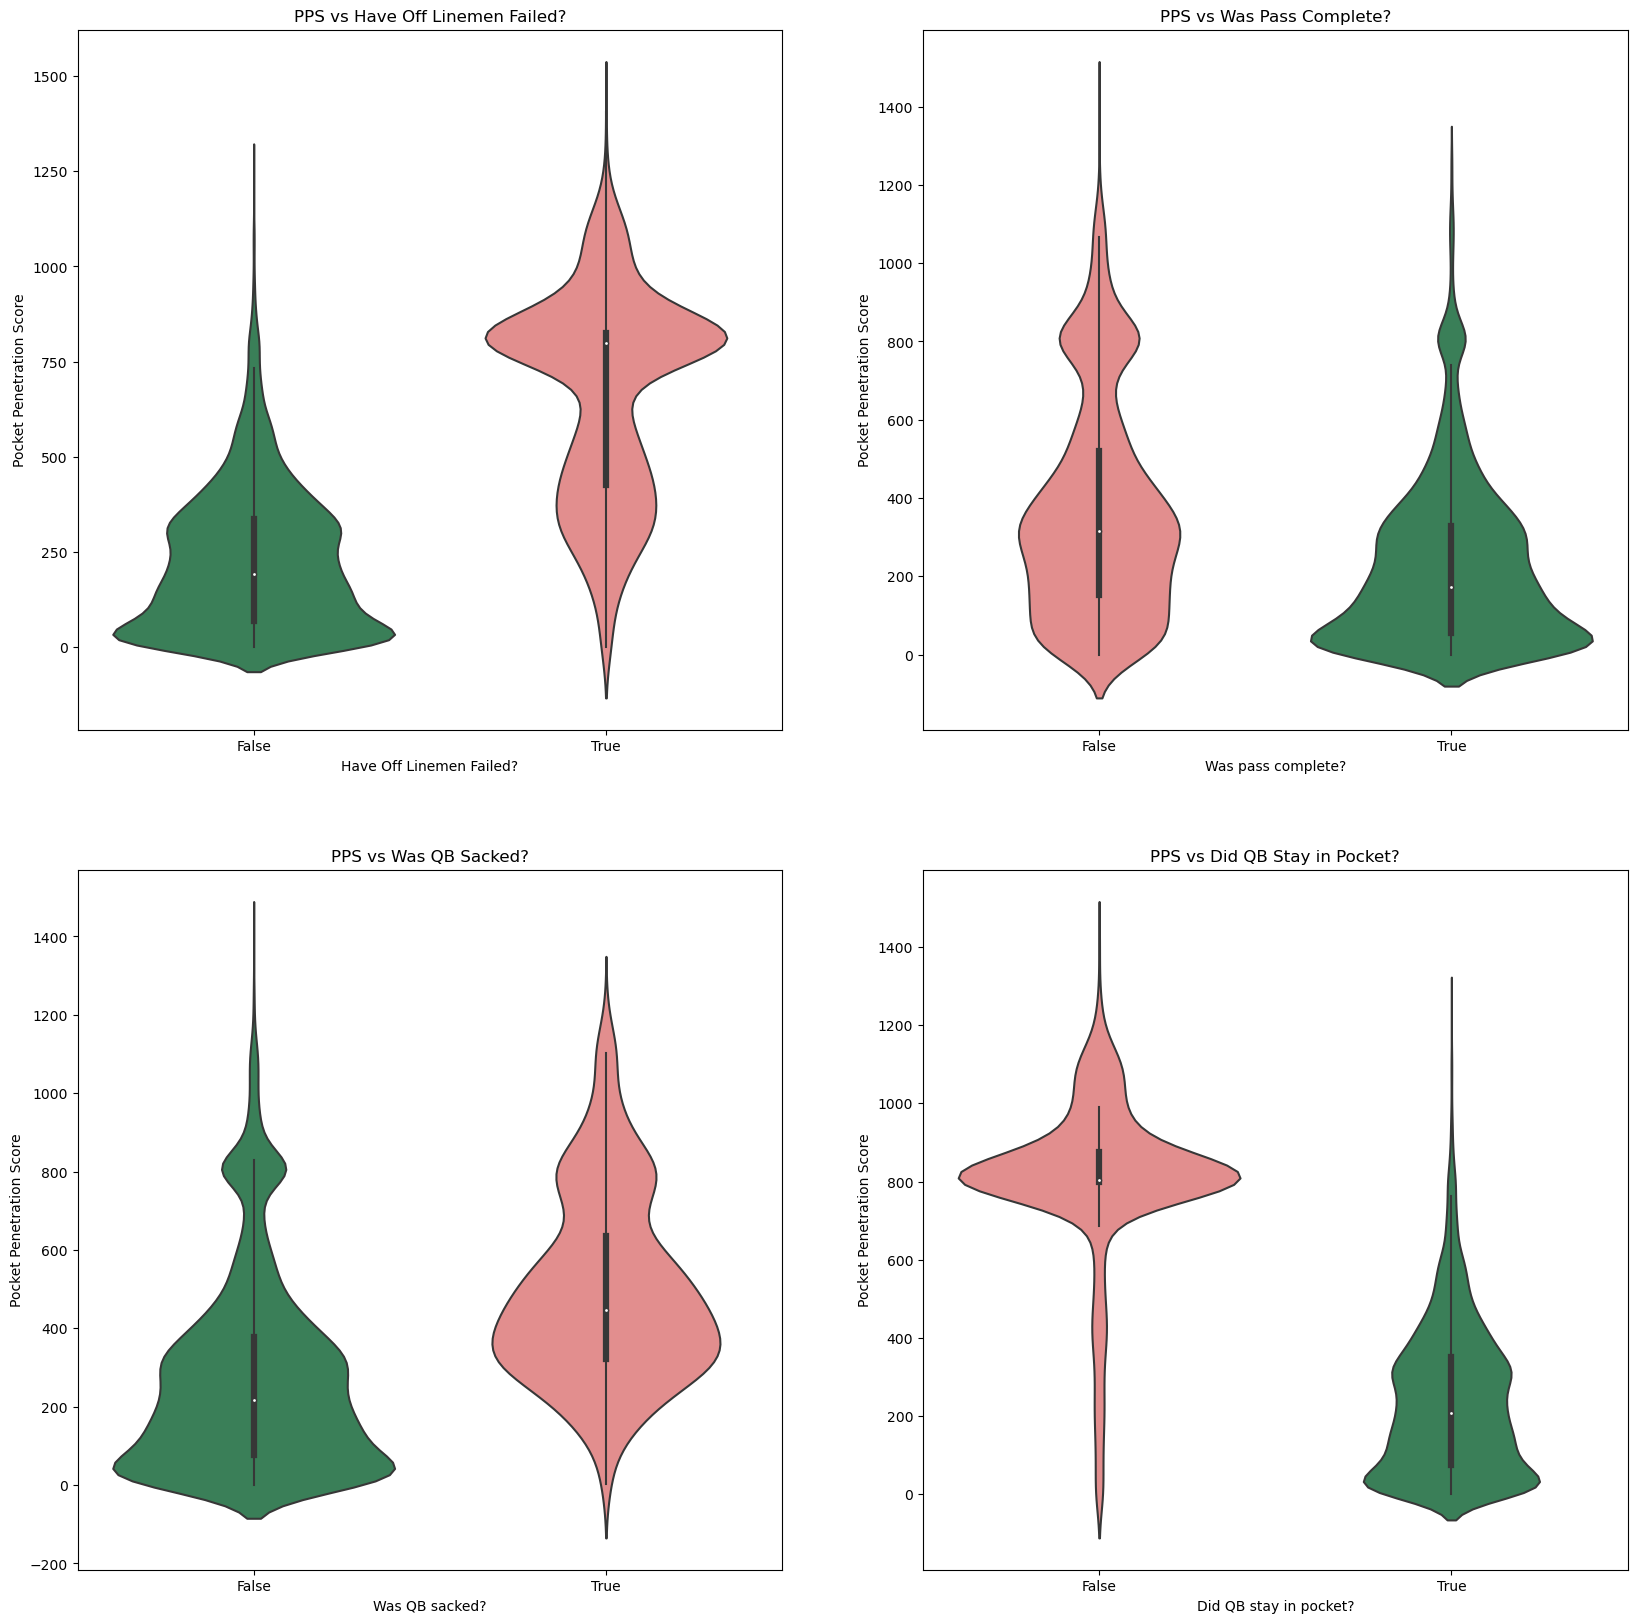

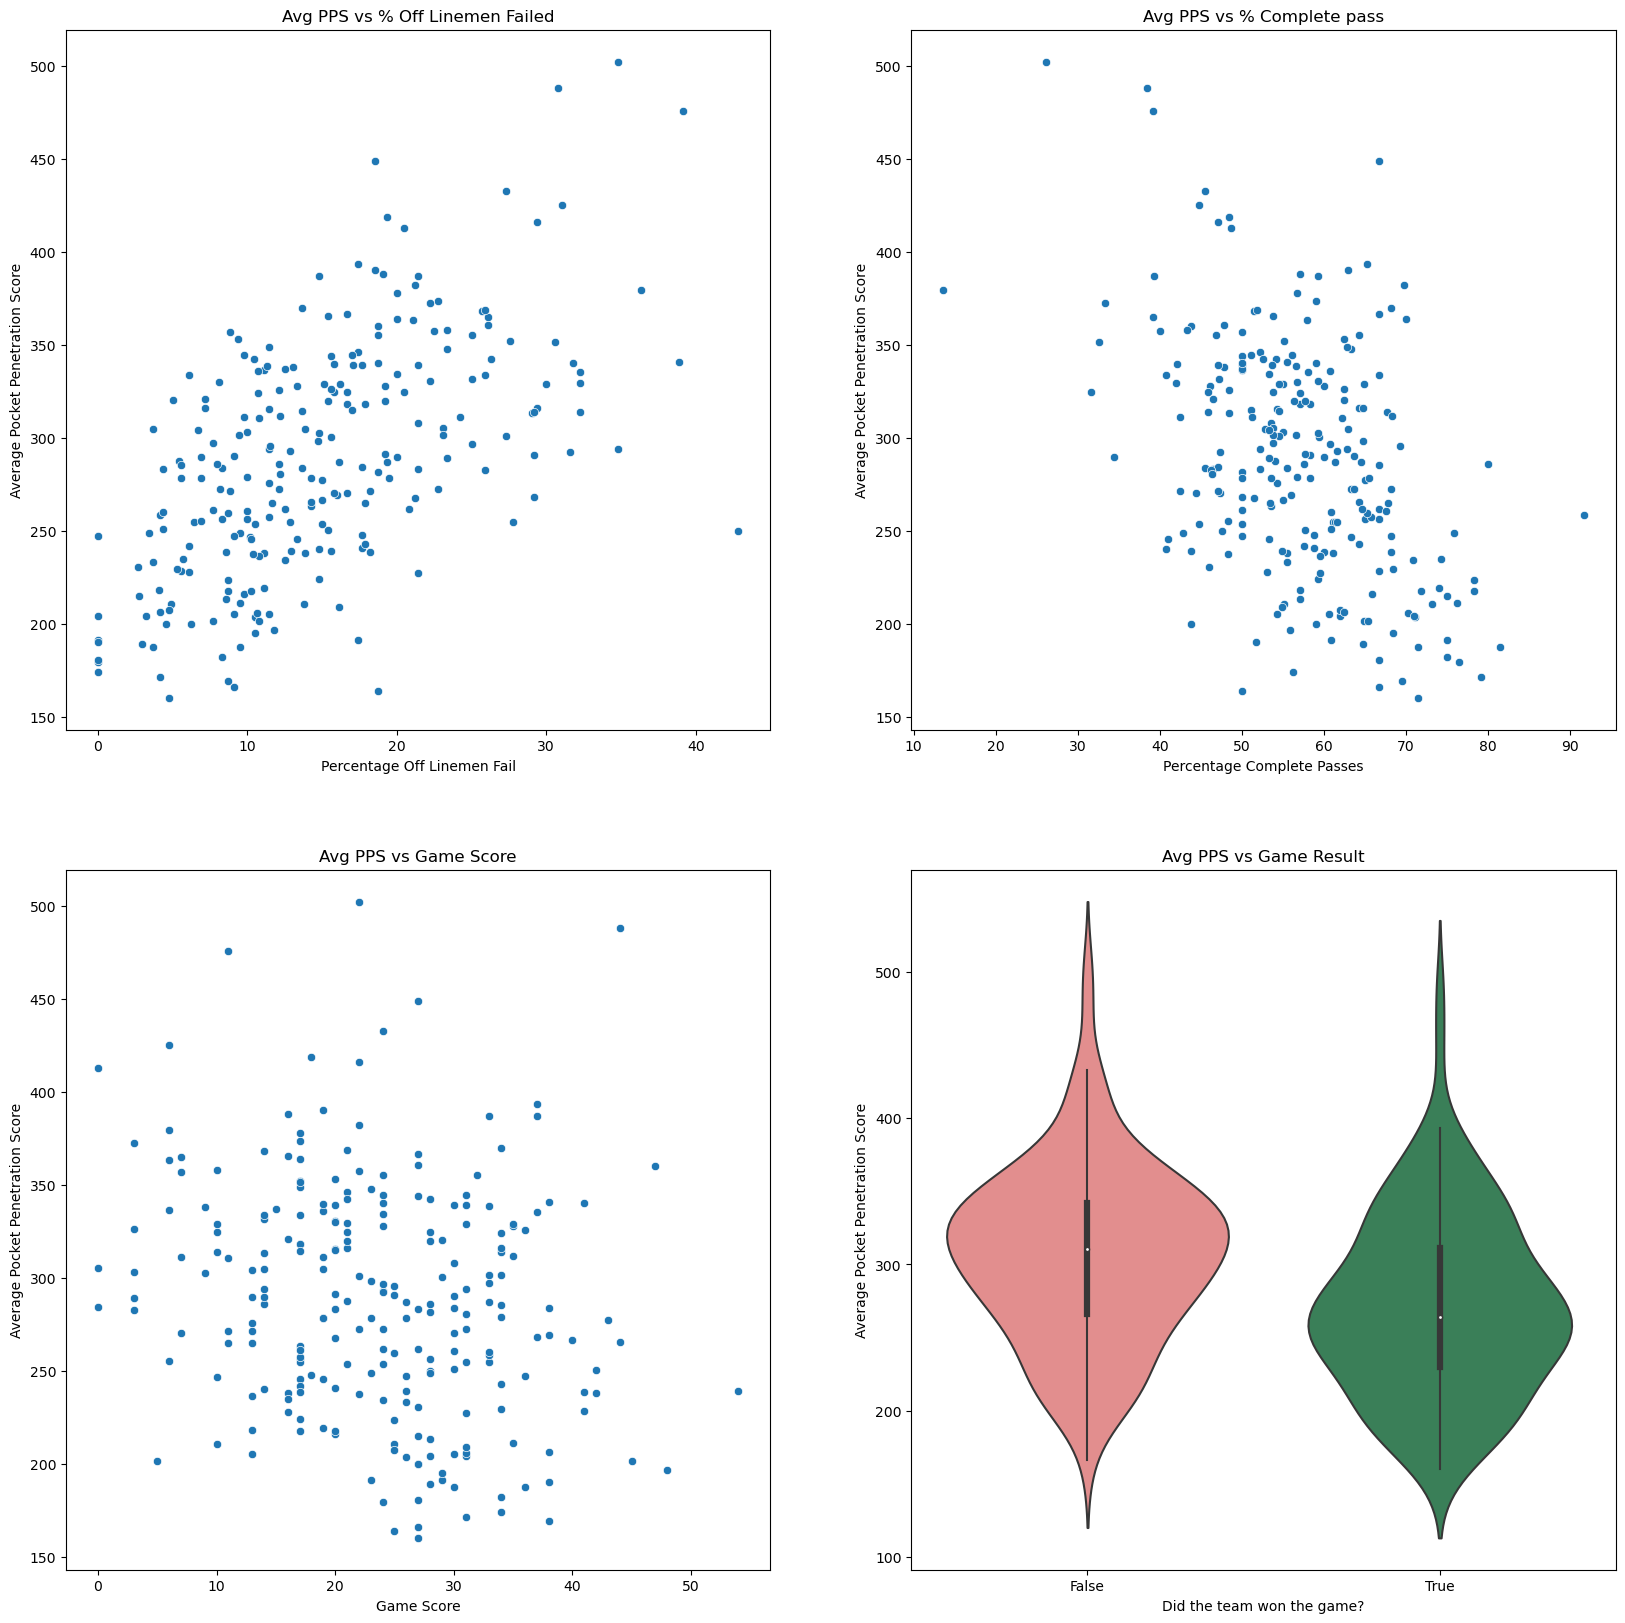

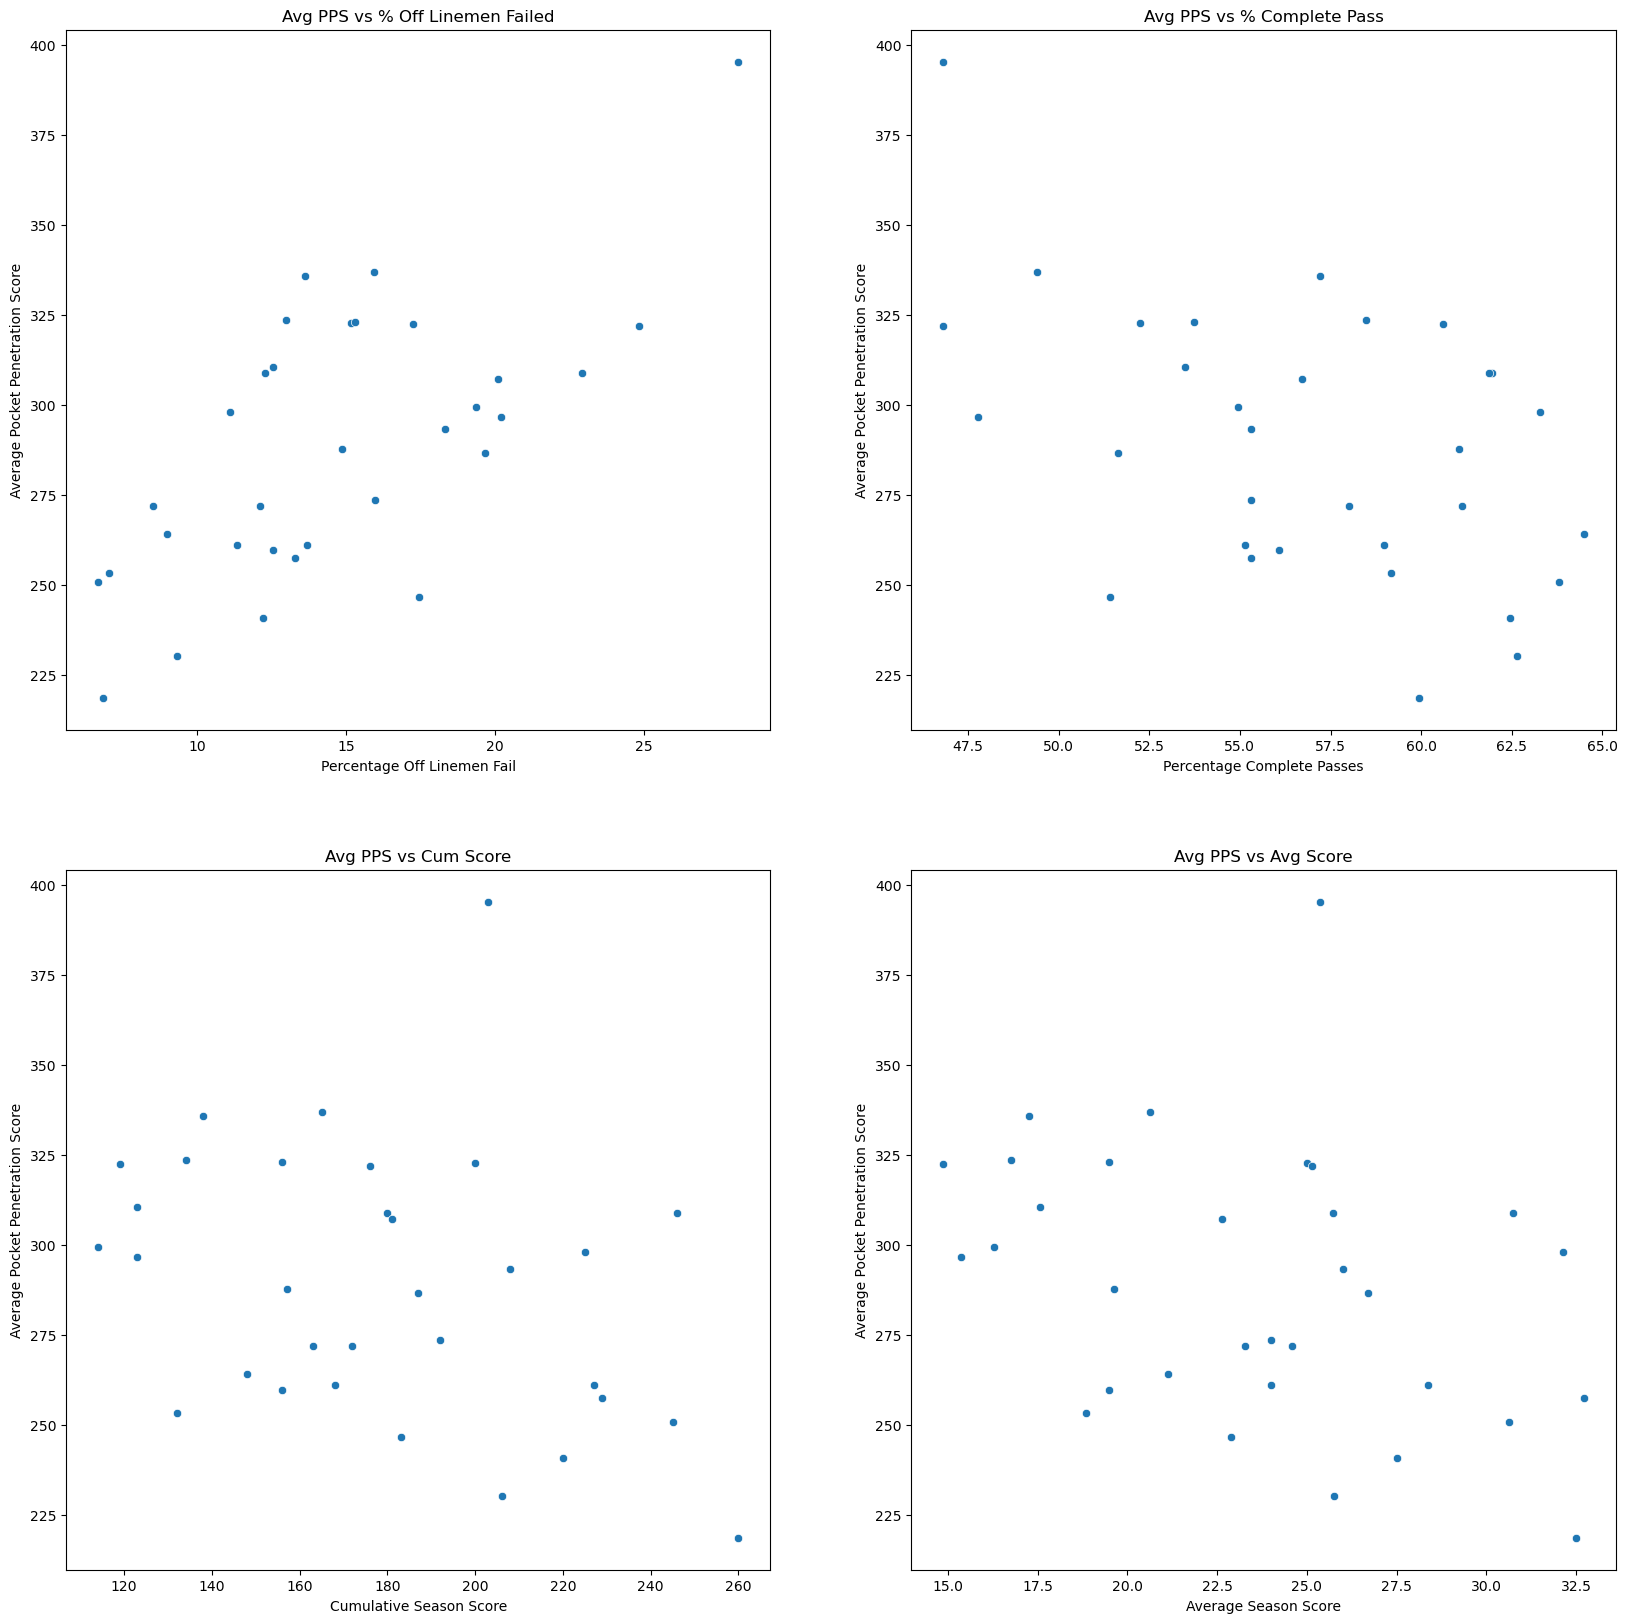

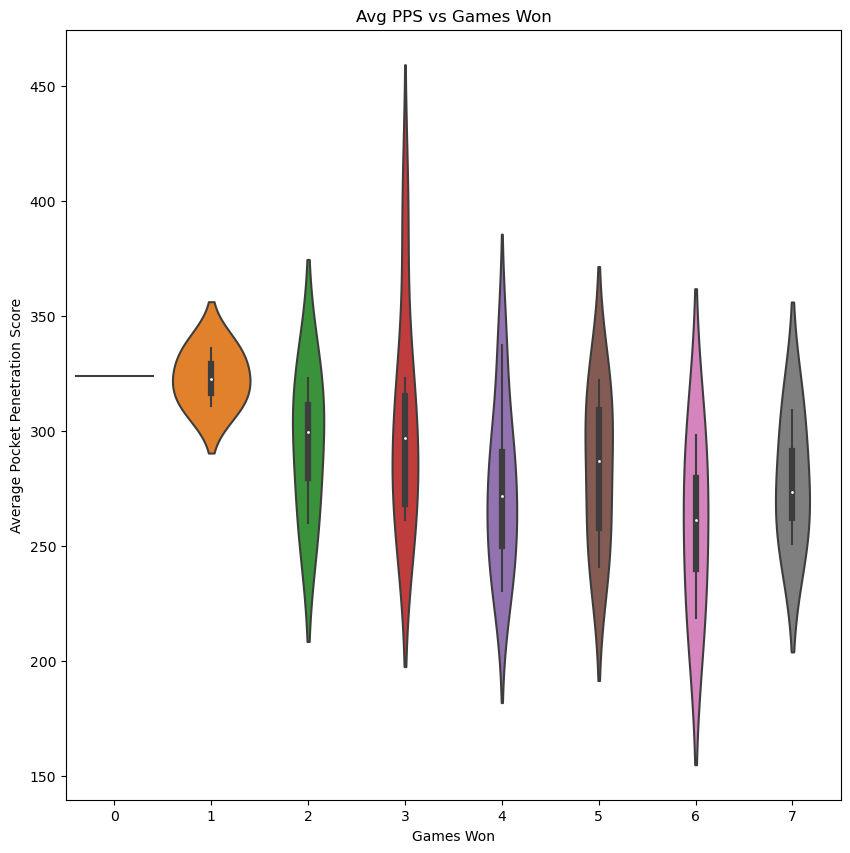

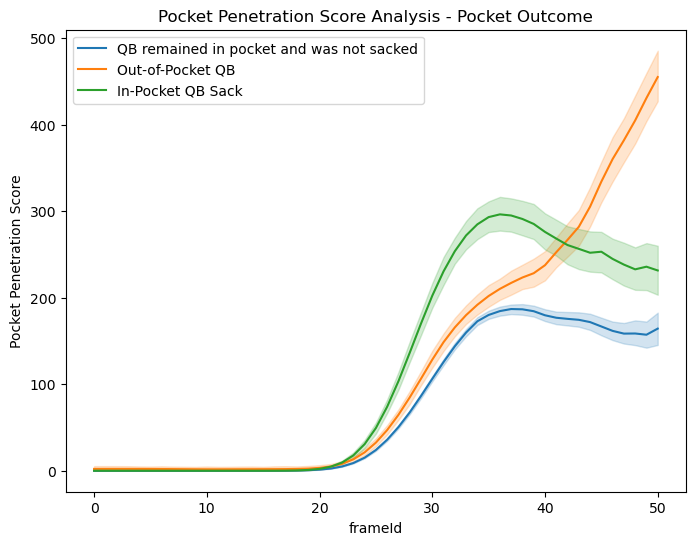

/Users/miguelcachosoblechero/Documents/Kaggle/NFL_2022/MagicNFL/exploration/../src/utils/evaluate_scores.py:449: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_timeseries, x='frameId', y='frameValue', hue='have_linemen_failed', ci=95)


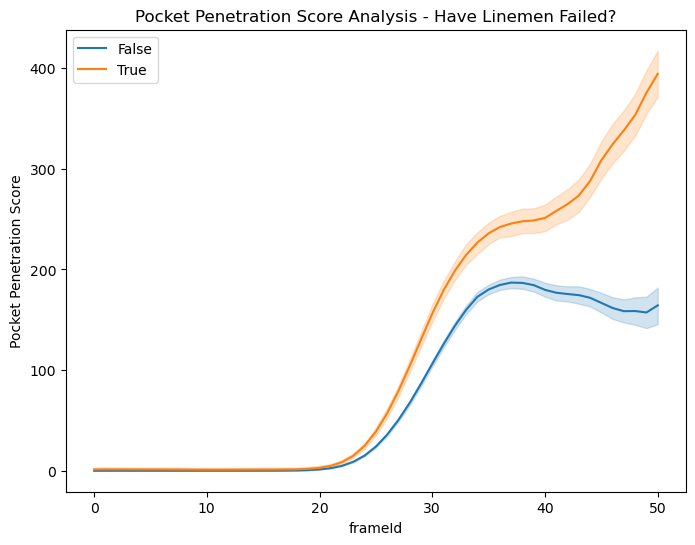

/Users/miguelcachosoblechero/Documents/Kaggle/NFL_2022/MagicNFL/exploration/../src/utils/evaluate_scores.py:457: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_timeseries, x='frameId', y='frameValue', hue='did_qb_stay_in_pocket', ci=95)


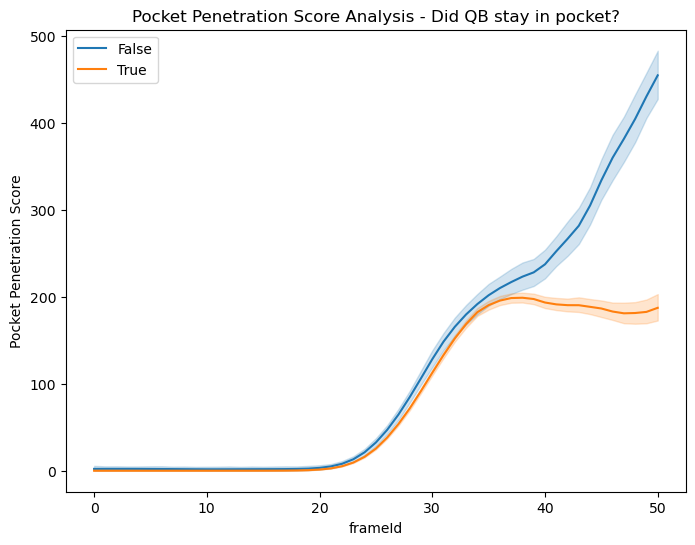

/Users/miguelcachosoblechero/Documents/Kaggle/NFL_2022/MagicNFL/exploration/../src/utils/evaluate_scores.py:465: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_timeseries, x='frameId', y='frameValue', hue='was_qb_sacked', ci=95)


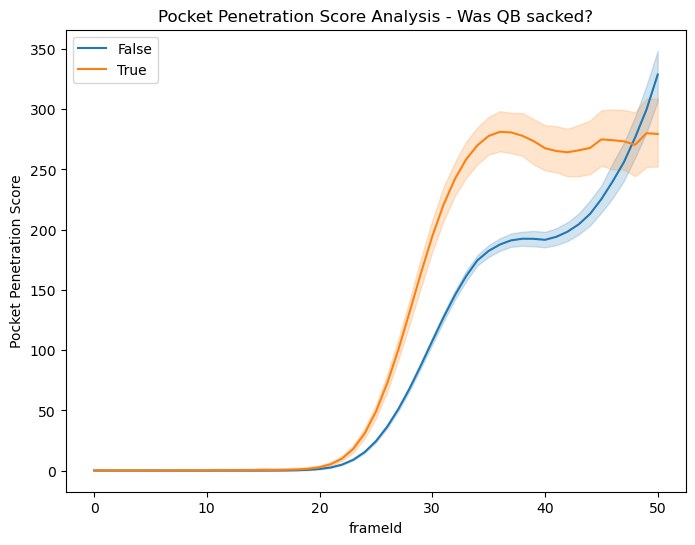

/Users/miguelcachosoblechero/Documents/Kaggle/NFL_2022/MagicNFL/exploration/../src/utils/evaluate_scores.py:473: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_timeseries, x='frameId', y='frameValue', hue='pass_complete', ci=95)


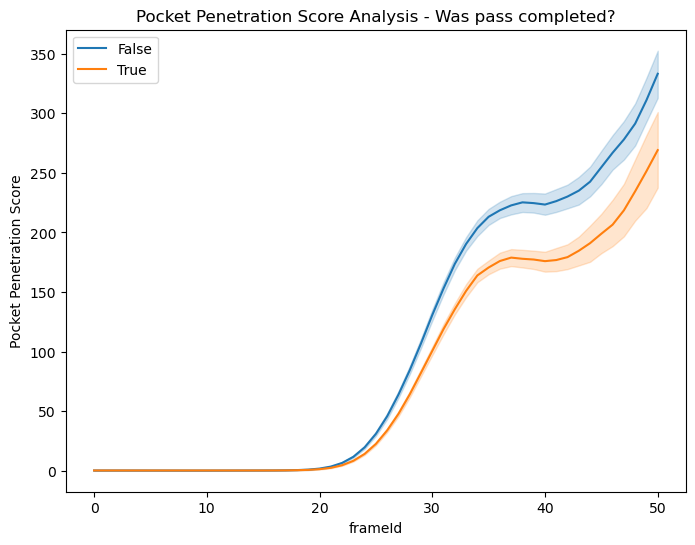

In [3]:
# plays = pd.read_csv(f"{input_path}/plays_analysis.csv")
plays = pd.read_csv(f"{input_path}/all_traditional_pass_plays.csv")
run_short_pipeline(input_path, preprocessing_path, plays, config, timeseries_plots = True, runId = "short_run_1")